In [1]:
# Importando bibliotecas a serem utilizadas no código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A naive recursive implementation of  
# optimal binary search tree problem  
  
# A recursive function to calculate  
# cost of optimal binary search tree  
def optCost(freq, i, j): 
      
    # Base cases  
    if j < i:     # no elements in this subarray  
        return 0
    if j == i:     # one element in this subarray  
        return freq[i]  
      
    # Get sum of freq[i], freq[i+1], ... freq[j]  
    fsum = Sum(freq, i, j)  
      
    # Initialize minimum value  
    Min = 999999999999
      
    # One by one consider all elements as  
    # root and recursively find cost of  
    # the BST, compare the cost with min 
    # and update min if needed  
    for r in range(i, j + 1): 
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))  
        if cost < Min:  
            Min = cost 
      
    # Return minimum value  
    return Min + fsum 
  
# The main function that calculates minimum  
# cost of a Binary Search Tree. It mainly  
# uses optCost() to find the optimal cost.  
def optimalSearchTree(keys, freq, n): 
      
    # Here array keys[] is assumed to be  
    # sorted in increasing order. If keys[]  
    # is not sorted, then add code to sort   
    # keys, and rearrange freq[] accordingly.  
    return optCost(freq, 0, n - 1) 
  
# A utility function to get sum of 
# array elements freq[i] to freq[j]  
def Sum(freq, i, j): 
    s = 0
    for k in range(i, j + 1): 
        s += freq[k]  
    return s 
  
# Driver Code 
if __name__ == '__main__': 
    keys = [10, 12, 20]  
    freq = [34, 8, 50]  
    n = len(keys)  
    print("Cost of Optimal BST is",  
           optimalSearchTree(keys, freq, n)) 
      
# This code is contributed by PranchalK 

Cost of Optimal BST is 142


In [3]:
# Lendo CSV dos textos
df = pd.read_csv("train.csv")
df.head()

,ID,article_link,headline,is_sarcastic
0,16916,https://www.huffingtonpost.com/entry/sex-advic...,free your mind your crotch will follow,0
1,603,https://local.theonion.com/last-12-years-a-rea...,last 12 years a real wake-up call for area man,1
2,11158,https://local.theonion.com/world-weary-man-bit...,world-weary man bitterly rents mercury rising,1
3,8342,https://www.huffingtonpost.com/entry/more-empl...,more employers may be using temps to skirt imm...,0
4,9842,https://www.huffingtonpost.comhttps://www.wash...,bergdahl to face court martial for desertion,0


In [4]:
# Removendo link do artigo e ID
df = df.drop(['article_link'], axis=1)
df = df.drop(['ID'], axis=1)
df.head()

,headline,is_sarcastic
0,free your mind your crotch will follow,0
1,last 12 years a real wake-up call for area man,1
2,world-weary man bitterly rents mercury rising,1
3,more employers may be using temps to skirt imm...,0
4,bergdahl to face court martial for desertion,0


In [5]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
print ("removendo pontuações : ",string.punctuation)

"""
Removendo pontuações, 
stop words 
e palavras com 
tamanho mínimo 3 (lemmatização)

"""

headlines = []
for item in df.headline:
    word_data = " "
    for item2 in item.split():
        if item2.lower() not in stop_words:
            word_data +=wordnet_lemmatizer.lemmatize(item2.lower())+" "
    headlines.append(word_data)
df['refined'] = headlines
def process(text):
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    clean_words = [word for word in nopunc.split() ]
    clean_words = " ".join(clean_words)
    return clean_words
df['refined'] = df['refined'].apply(process)

removendo pontuações :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
# Removendo headline não refinado
df = df.drop(['headline'], axis=1)
df.head()

,is_sarcastic,refined
0,0,free mind crotch follow
1,1,last 12 year real wakeup call area man
2,1,worldweary man bitterly rent mercury rising
3,0,employer may using temp skirt immigration law
4,0,bergdahl face court martial desertion


In [7]:
sarcasm = df[df.is_sarcastic==1]
sarcasm.reset_index(drop=True, inplace=True)
acclaim = df[df.is_sarcastic==0]
acclaim.reset_index(drop=True, inplace=True)

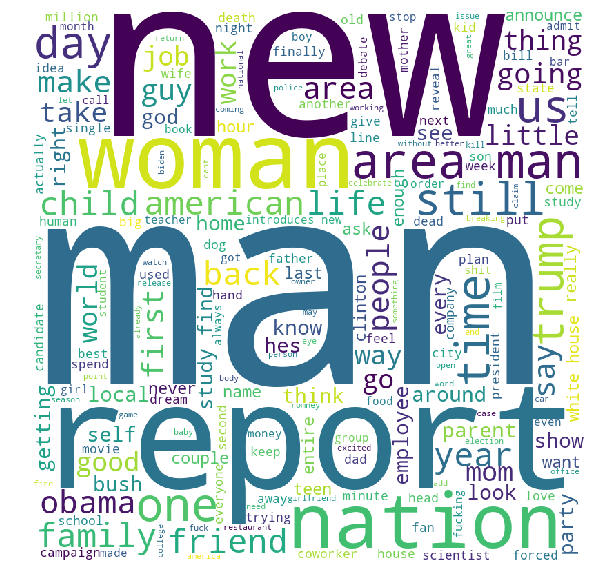

In [8]:
# Criando wordcloud para visualização do dataset sarcástico

sarcastic_words = " "

for item in sarcasm.refined:
    for inner_item in item.lower().split():
        sarcastic_words+=inner_item+" "
        
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
sarcastic_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(sarcastic_words)

# plot the sarcastic WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(sarcastic_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

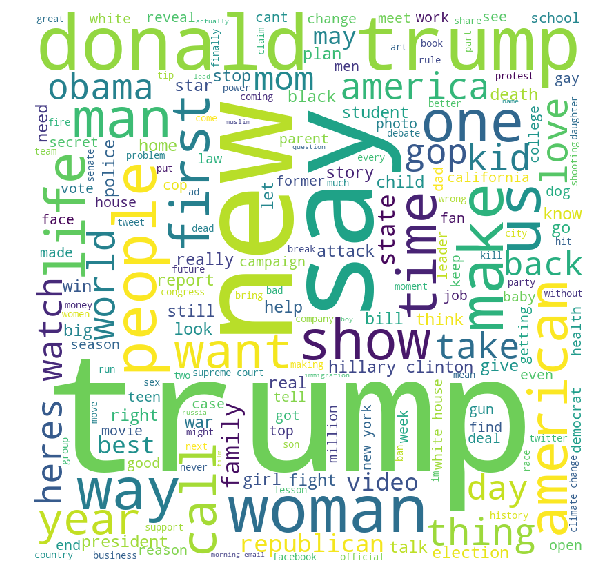

In [9]:
# Criando wordcloud para visualização do dataset de aclamação
acclaim_words = " "

for item in acclaim.refined:
            for inner_item in item.lower().split():
                acclaim_words+=inner_item+" "
                
acclaim_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(acclaim_words) 
  
# plot the sarcastic WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(acclaim_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer().fit(sarcasm.refined)
bag_of_words = vec.transform(sarcasm.refined)
sum_words = bag_of_words.sum(axis=0) 

In [11]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
print (words_freq)

[('last', 98), ('12', 15), ('year', 144), ('real', 36), ('wakeup', 1), ('call', 45), ('area', 330), ('man', 722), ('worldweary', 2), ('bitterly', 1), ('rent', 4), ('mercury', 1), ('rising', 6), ('either', 8), ('ming', 1), ('yuan', 1), ('dynasty', 1), ('seizes', 2), ('control', 23), ('mainland', 1), ('china', 10), ('new', 592), ('pepsi', 3), ('product', 18), ('specifically', 6), ('mention', 15), ('target', 12), ('demographic', 9), ('name', 59), ('inspirational', 3), ('english', 9), ('teacher', 42), ('canceled', 6), ('every', 76), ('school', 87), ('congress', 40), ('cant', 90), ('remember', 19), ('time', 183), ('got', 41), ('together', 26), ('legislated', 1), ('like', 153), ('rupert', 2), ('murdoch', 2), ('acquires', 9), ('cable', 5), ('hubble', 3), ('telescope', 3), ('discovers', 6), ('giant', 16), ('amelia', 1), ('earhart', 1), ('statue', 13), ('distant', 3), ('planet', 19), ('sgt', 2), ('bowe', 1), ('bergdahl', 1), ('recaptured', 1), ('taliban', 4), ('wandering', 2), ('texas', 18), ('

In [12]:
def sortSecond(val): 
    return val[1]  
  
# sorts the array in descending according to 
# second element 
words_freq.sort(key = sortSecond, reverse = True) 
print(words_freq) 

[('man', 722), ('new', 592), ('report', 331), ('area', 330), ('woman', 266), ('get', 207), ('american', 186), ('one', 184), ('time', 183), ('day', 173), ('find', 157), ('like', 153), ('study', 151), ('us', 148), ('trump', 145), ('still', 145), ('year', 144), ('family', 133), ('obama', 127), ('back', 127), ('life', 125), ('nation', 125), ('first', 124), ('make', 120), ('say', 118), ('house', 115), ('child', 112), ('going', 107), ('friend', 105), ('people', 105), ('nations', 101), ('last', 98), ('guy', 97), ('take', 97), ('good', 94), ('white', 92), ('local', 91), ('cant', 90), ('clinton', 90), ('way', 89), ('would', 88), ('thing', 88), ('plan', 88), ('go', 88), ('little', 88), ('school', 87), ('home', 85), ('job', 83), ('work', 82), ('mom', 77), ('show', 77), ('every', 76), ('hes', 76), ('right', 75), ('mans', 75), ('self', 74), ('party', 74), ('look', 74), ('know', 73), ('bush', 72), ('getting', 70), ('god', 70), ('really', 70), ('parent', 70), ('state', 68), ('see', 67), ('introduces'

In [13]:
keys = []
freqs = []
for item in words_freq:
    keys.append(item[0])

for item in words_freq:
    freqs.append(item[1])

In [15]:
print("Cost of Optimal BST is",  
           optimalSearchTree(keys[:10], freqs[:10], 10))  

Cost of Optimal BST is 8648
